### Importing necessarily libraries

In [8]:
import os
import cv2 #opencv image processing
import time # Runtime calculation
import shutil 
import itertools
import tensorflow # Deep Learning Frameworks
import numpy as np  # Mathematical and Array Operations
import pandas as pd# Data Frame Operations
from PIL import Image # Python Imaging Library
import seaborn as sns # Visualization library
import matplotlib.pyplot as plt  # Visualization library
# Deep Learning API functionalities
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation 
from tensorflow.keras.models import Sequential # Sequential model initialization
from sklearn.model_selection import train_test_split  # function to split sample data to train and test
from tensorflow.keras.optimizers import Adam, Nadam, Ftrl # Optimizer algorithms
from tensorflow.keras.metrics import categorical_crossentropy  # Loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For data pipeline building
# Neural network layers
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
# To prevent Over-fitting
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_names = os.listdir('/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/')
class_types = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/data/New_Images/train'))
print('Number of classes for Classification: ',class_types)
print(f'The class names are {class_names[0]} and {class_names[1]} and {class_names[2]}')
print('--> Count of Train Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/'+i))))
print('--> Count of Validation Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/data/New_Images/test/'+i))))
    

Number of classes for Classification:  3
The class names are partial_thickness and full_thickness and superficial_dermal
--> Count of Train Images <--
partial_thickness:14
full_thickness:17
superficial_dermal:12
--> Count of Validation Images <--
partial_thickness:1
full_thickness:2
superficial_dermal:1


### Image data generators for generating images

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/',
        target_size=(224,224),
        batch_size=16,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/data/New_Images/test/',
        target_size=(224,224),
        batch_size=8,
        class_mode='categorical')

Found 43 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


### Some data visualization

### Visualizing all three burn categories

In [ ]:
import glob

### Full thickness

In [ ]:
full_thickness_images = []

full_thickness_directory = glob.glob("/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/full_thickness/*.jpg")

for file in full_thickness_directory:
    full_thickness_images.append(file)

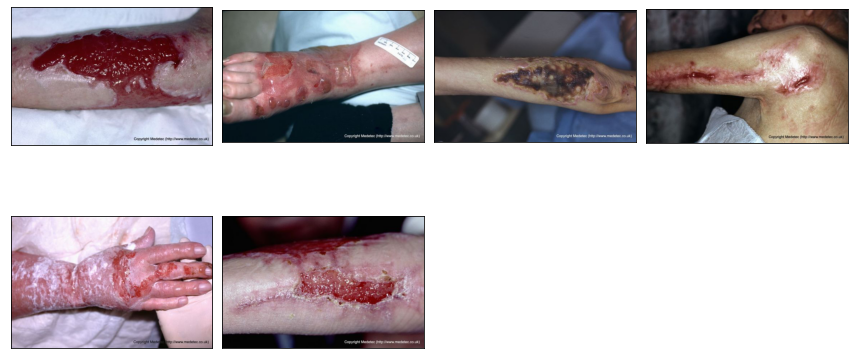

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (15, 15))
for i in range(len(full_thickness_directory)):
    img = mpimg.imread(full_thickness_directory[i])
    plt.subplot(4, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
    plt.imshow(img)
plt.show()

### Partial thickness

In [ ]:
partial_thickness_images = []

partial_thickness_directory = glob.glob("/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/partial_thickness/*.JPG")

for file in partial_thickness_directory:
    partial_thickness_images.append(file)

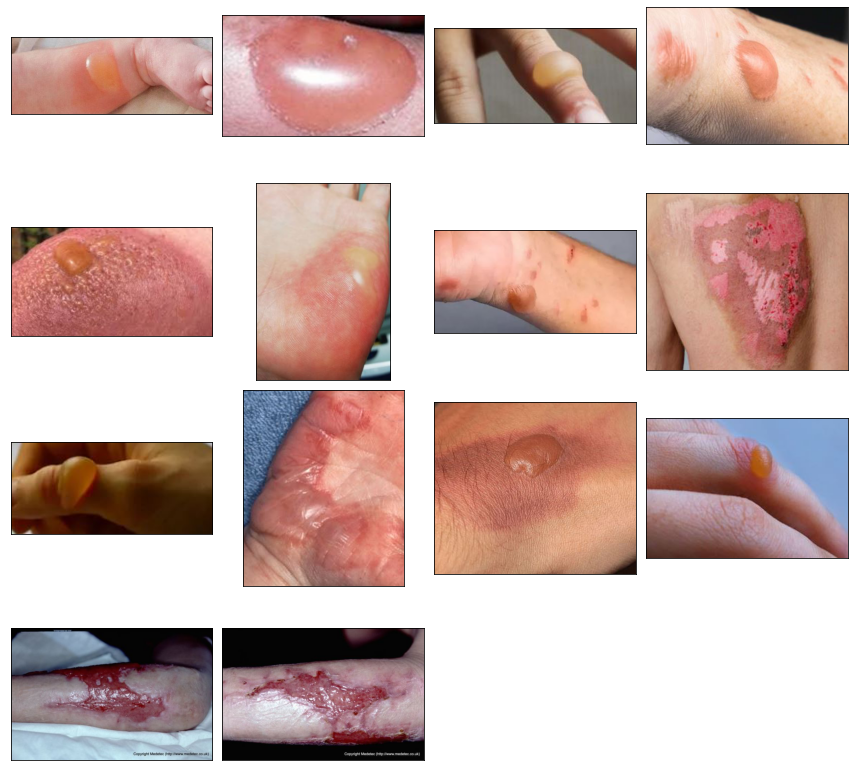

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (15, 15))
for i in range(len(partial_thickness_directory)):
    img = mpimg.imread(partial_thickness_directory[i])
    plt.subplot(4, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
    plt.imshow(img)
plt.show()

### Superficial dermal

In [ ]:
superficial_dermal_images = []

superficial_dermal_directory = glob.glob("/content/drive/MyDrive/Colab Notebooks/data/New_Images/train/superficial_dermal/*.jpg")

for file in superficial_dermal_directory:
    superficial_dermal_images.append(file)

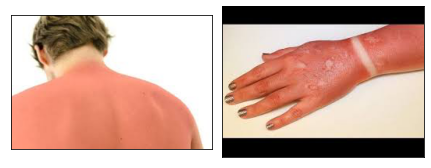

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (15, 15))
for i in range(len(superficial_dermal_directory)):
    img = mpimg.imread(superficial_dermal_directory[i])
    plt.subplot(4, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
    plt.imshow(img)
plt.show()

### Applying neural networks

### Applying VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (224, 224, 3),include_top = False,weights = 'imagenet')
# we don’t have to train all the layers, we make them non_trainable
for layer in base_model.layers:
    layer.trainable = False
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5 or any acceptable values as per your need/complexity
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(3,activation='softmax')(x) # Use Softmax if class more than 2 classes
model = tensorflow.keras.models.Model(base_model.input,x)

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=10,validation_data=validation_generator)
model.save('/content/drive/MyDrive/Colab Notebooks/model/model_vgg_16.h5')

Epoch 1/10
3/3 [==============================] - 23s 7s/step - loss: 61.1506 - accuracy: 0.2558 - val_loss: 41.6030 - val_accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 24s 8s/step - loss: 25.5545 - accuracy: 0.4419 - val_loss: 14.3034 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 22s 8s/step - loss: 20.5962 - accuracy: 0.5349 - val_loss: 23.3554 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 22s 8s/step - loss: 18.0558 - accuracy: 0.5349 - val_loss: 0.3211 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 24s 9s/step - loss: 7.4237 - accuracy: 0.7209 - val_loss: 5.2394e-04 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 22s 7s/step - loss: 6.8833 - accuracy: 0.7209 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 24s 8s/step - loss: 8.1234 - accuracy: 0.6977 - val_loss: 10.0863 - val_accuracy: 0.5000
Epoch 8/10
3/3 [======

### Accuracy loss graph for VGG16

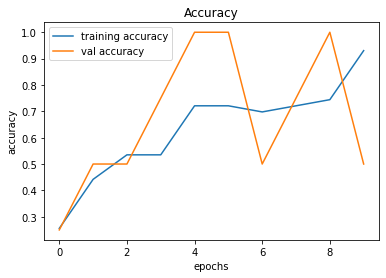

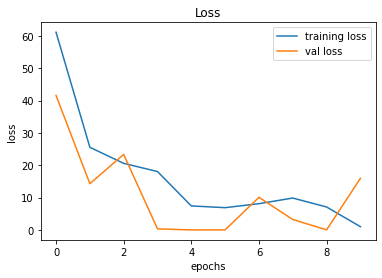

In [ ]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Applying resnet50

In [ ]:
base_model = tensorflow.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3),classes=3)

In [ ]:
tailModel = base_model.output
tailModel = AveragePooling2D(pool_size=(7, 7))(tailModel)
tailModel = Flatten(name="flatten")(tailModel)
tailModel = Dense(256, activation="relu")(tailModel)
tailModel = Dropout(0.2)(tailModel)
tailModel = Dense(3, activation="softmax")(tailModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
resmodel = Model(inputs=base_model.input, outputs=tailModel)
# loop over all layers in the base model and freeze them so they will
# layers not freezed will be updated during the training process
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
resmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resmodel.fit(train_generator,epochs=10,validation_data=validation_generator)
resmodel.save('/content/drive/MyDrive/Colab Notebooks/model/model_res.h5')

Epoch 1/10
3/3 [==============================] - 12s 3s/step - loss: 4.8801 - accuracy: 0.3256 - val_loss: 4.2224 - val_accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 7s 3s/step - loss: 2.9384 - accuracy: 0.2791 - val_loss: 1.2991 - val_accuracy: 0.2500
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 1.1914 - accuracy: 0.3023 - val_loss: 1.3568 - val_accuracy: 0.2500
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 1.3349 - accuracy: 0.3256 - val_loss: 1.2709 - val_accuracy: 0.2500
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 1.2326 - accuracy: 0.3023 - val_loss: 1.1190 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 1.1558 - accuracy: 0.4186 - val_loss: 1.0542 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 1.1113 - accuracy: 0.3256 - val_loss: 1.0739 - val_accuracy: 0.5000
Epoch 8/10
3/3 [========================

### Accuracy loss graph for resnet50

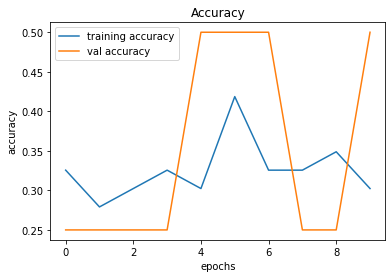

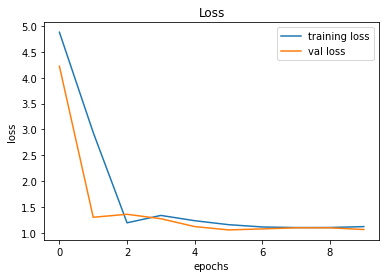

In [ ]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(resmodel.history.history['accuracy'], label='training accuracy')
plt.plot(resmodel.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(resmodel.history.history['loss'], label='training loss')
plt.plot(resmodel.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Applying 11 layer convolutional neural network

In [ ]:
# Build a 11 layer Convolutional Neural Network from scratch

modelcnn_11 = Sequential()
modelcnn_11.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
modelcnn_11.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_11.add(MaxPooling2D((2, 2)))
modelcnn_11.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_11.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_11.add(MaxPooling2D((2, 2)))
modelcnn_11.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_11.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_11.add(MaxPooling2D((2, 2)))
modelcnn_11.add(Flatten())
modelcnn_11.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelcnn_11.add(Dense(3, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
modelcnn_11.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
   

In [ ]:
# model = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelcnn_11.fit(train_generator,epochs=10,validation_data=validation_generator)
modelcnn_11.save('/content/drive/MyDrive/Colab Notebooks/model/model_cnn_11.h5')

Epoch 1/10
3/3 [==============================] - 15s 4s/step - loss: 1709.0695 - accuracy: 0.3023 - val_loss: 4.1436 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 13s 4s/step - loss: 2.9447 - accuracy: 0.3721 - val_loss: 1.0657 - val_accuracy: 0.2500
Epoch 3/10
3/3 [==============================] - 13s 4s/step - loss: 1.0996 - accuracy: 0.3023 - val_loss: 1.1010 - val_accuracy: 0.2500
Epoch 4/10
3/3 [==============================] - 13s 4s/step - loss: 1.3791 - accuracy: 0.3488 - val_loss: 1.1009 - val_accuracy: 0.2500
Epoch 5/10
3/3 [==============================] - 13s 4s/step - loss: 1.1005 - accuracy: 0.3256 - val_loss: 1.1045 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 15s 6s/step - loss: 1.0993 - accuracy: 0.3256 - val_loss: 1.1040 - val_accuracy: 0.2500
Epoch 7/10
3/3 [==============================] - 18s 6s/step - loss: 1.0986 - accuracy: 0.3256 - val_loss: 1.1021 - val_accuracy: 0.2500
Epoch 8/10
3/3 [===============

### Accuracy loss graph for 11 layer convolutional neural network

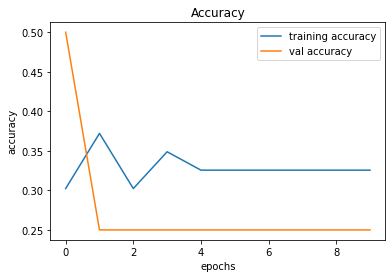

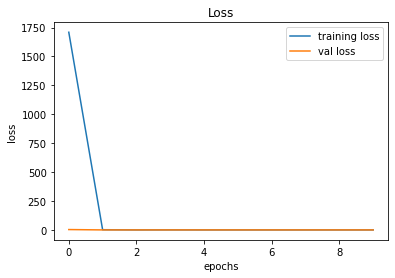

In [ ]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(modelcnn_11.history.history['accuracy'], label='training accuracy')
plt.plot(modelcnn_11.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(modelcnn_11.history.history['loss'], label='training loss')
plt.plot(modelcnn_11.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Applying 23 layer convolutional neural network

In [ ]:
# Build a 23 layer CNN from scratch

modelcnn_23 = Sequential()
modelcnn_23.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
modelcnn_23.add(MaxPooling2D((2, 2)))
modelcnn_23.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(MaxPooling2D((2, 2)))
modelcnn_23.add(Dropout(0.2))
modelcnn_23.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(MaxPooling2D((2, 2)))
modelcnn_23.add(Dropout(0.3))
modelcnn_23.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(MaxPooling2D((2, 2)))
modelcnn_23.add(Dropout(0.4))
modelcnn_23.add(Flatten())
modelcnn_23.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelcnn_23.add(BatchNormalization())
modelcnn_23.add(Dropout(0.2))
modelcnn_23.add(Dense(3,activation='softmax'))
# compile modelcnn_23
opt = tensorflow.keras.optimizers.Adam()
modelcnn_23.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
modelcnn_23.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelcnn_23.fit(train_generator,epochs=10,validation_data=validation_generator)
modelcnn_23.save('/content/drive/MyDrive/Colab Notebooks/model/model_cnn_23.h5')

Epoch 1/10
3/3 [==============================] - 8s 2s/step - loss: 2.0165 - accuracy: 0.3953 - val_loss: 299.8763 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.0889 - accuracy: 0.6279 - val_loss: 983.1536 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 1.1482 - accuracy: 0.5814 - val_loss: 654.5230 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.9398 - accuracy: 0.6977 - val_loss: 227.4793 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.7473 - accuracy: 0.6047 - val_loss: 1250.9402 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.5522 - accuracy: 0.6977 - val_loss: 840.3713 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.3957 - accuracy: 0.8372 - val_loss: 828.7164 - val_accuracy: 0.2500
Epoch 8/10
3/3 [==========

### Accuracy loss graph for 23 layer neural network

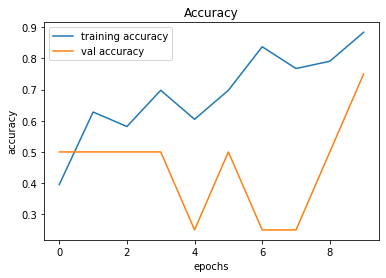

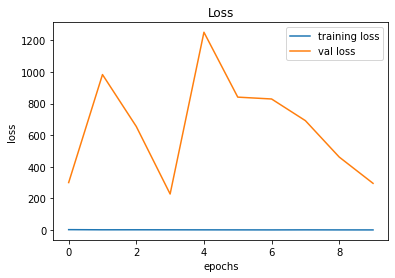

In [ ]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(modelcnn_23.history.history['accuracy'], label='training accuracy')
plt.plot(modelcnn_23.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(modelcnn_23.history.history['loss'], label='training loss')
plt.plot(modelcnn_23.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [9]:
!pip install -q streamlit
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://1457-35-201-206-230.ngrok.io" -> "http://localhost:80">

In [11]:
%%writefile streamlit_app.py
import streamlit as st
#Predicting the final result of image
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from PIL import Image
import io
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
gauth = GoogleAuth()           
drive = GoogleDrive(gauth) 

target_size = (224, 224)

#Loading the Model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model/model_cnn_23.h5', compile=False)

st.title("Burn Skin detection with Deep Learning")
st.text("This app uses Deep learning from keras to identify objects from images.")

#Uploading the dog image
uploaded_file = st.file_uploader("Upload an image...", type=['png','jpg','webp'])
if uploaded_file is not None:
    bytes_data = uploaded_file.getvalue()
    st.image(bytes_data)

submit_button = st.button("Predict")

if submit_button:
  if uploaded_file is not None:
      img = Image.open(io.BytesIO(bytes_data))
      img = img.convert('RGB')
      img = img.resize(target_size, Image.NEAREST)
      img = image.img_to_array(img)

      test_image = np.expand_dims(img, axis = 0)
  
      # Predicting the final class
      result = model.predict(test_image).argmax()
      #st.markdown(result)
      # Fetching the class labels
      labels ={'full_thickness': 0, 'partial_thickness': 1, 'superficial_dermal': 2}
      labels = list(labels.items())
      print(result)
      #Printing the final label
      for  label,i in labels:
        if i == result:
          st.success(f"The test image belongs to: {label} ")
  else:
    st.error('Image not Uploaded...')

Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

npx: installed 22 in 4.832s
your url is: https://thin-toys-give-35-201-206-230.loca.lt



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.201.206.230:8501

2023-01-20 00:31:14.262653: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
1/1 [==============================] - 0s 458ms/step
0
1/1 [==============================] - 0s 368ms/step
2
1/1 [==============================] - 0s 179ms/step
0
1/1 [==============================] - 0s 181ms/step
0
2023-01-20 00:38:51.816 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fada539ba60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1),